In [27]:
import matplotlib.pyplot as plt
import json

def plot_metric(name, metrics):
    train_steps, train_loss = [], []
    val_steps, val_loss = [], []
    for entry in metrics:
        step = entry.get("step")

        if "loss" in entry and "eval_loss" not in entry:
            train_steps.append(step)
            train_loss.append(entry["loss"])

        if "eval_loss" in entry:
            val_steps.append(step)
            val_loss.append(entry["eval_loss"])

    plt.figure(figsize=(10, 5))
    plt.plot(train_steps, train_loss, label="Train Loss", marker="o", linestyle="-")
    plt.plot(val_steps, val_loss, label="Validation Loss", marker="s", linestyle="--")
    plt.xlabel("Steps")
    plt.ylabel("Loss")
    plt.title("Training and Validation Loss Over Steps for {}".format(name))
    plt.legend()
    plt.grid(True)
    plt.show()
    

def plot_all_validation_metrics(metrics_dict, names_dict=None):
    """
    Plots validation loss from multiple metrics in a single plot.

    Args:
        metrics_dict (dict): A dictionary where keys are metric names and values are metric lists.
    """
    plt.figure(figsize=(10, 5))

    for name, metrics in metrics_dict.items():
        val_steps, val_loss = [], []

        for entry in metrics:
            step = entry.get("step")
            if "eval_loss" in entry:
                val_steps.append(step)
                val_loss.append(entry["eval_loss"])
        if names_dict is not None:
            name = names_dict[name]

        plt.plot(val_steps, val_loss, label=f"{name} Validation Loss", marker="o", linestyle="--")

    plt.xlabel("Steps")
    plt.ylabel("Loss")
    plt.title("Validation Loss Across Different Pruning Strategies")
    plt.legend()
    plt.grid(True)
    plt.show()



In [28]:
with open("../saved_metrics/training_metrics.json", "r") as f:
    all_metrics = json.load(f)
    
with open("../saved_metrics/training_metrics_embedding.json", "r") as f:
    embedding_metrics = json.load(f)

In [29]:
print(all_metrics.keys())

width_comparison_metrics = ['num_heads=6_mlp_exp=3.5_embed_size=1024', 'num_heads=10_mlp_exp=3_embed_size=1024', 'num_heads=12_mlp_exp=2.5_embed_size=1024', 'num_heads=16_hidden_size=4096_embed_size=768']

dict_keys(['num_heads=6_mlp_exp=3.5_embed_size=1024', 'num_heads=10_mlp_exp=3_embed_size=1024', 'num_heads=12_mlp_exp=2.5_embed_size=1024', 'untrained_num_heads=12_mlp_exp=2.5_embed_size=1024', 'num_heads=16_hidden_size=4096_embed_size=768', 'depth=16', 'depth=20_num_heads=12_mlp_exp=3.5_embed_size=1024'])


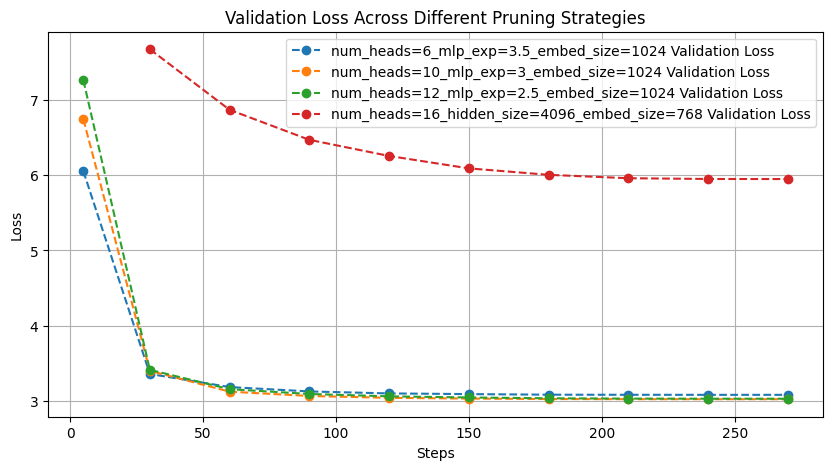

In [30]:
plot_all_validation_metrics({e: all_metrics[e] for e in width_comparison_metrics})

dict_keys(['num_heads=6_mlp_exp=3.5_embed_size=1024', 'num_heads=10_mlp_exp=3_embed_size=1024', 'num_heads=12_mlp_exp=2.5_embed_size=1024', 'untrained_num_heads=12_mlp_exp=2.5_embed_size=1024', 'num_heads=16_hidden_size=4096_embed_size=768', 'depth=16', 'depth=20_num_heads=12_mlp_exp=3.5_embed_size=1024'])


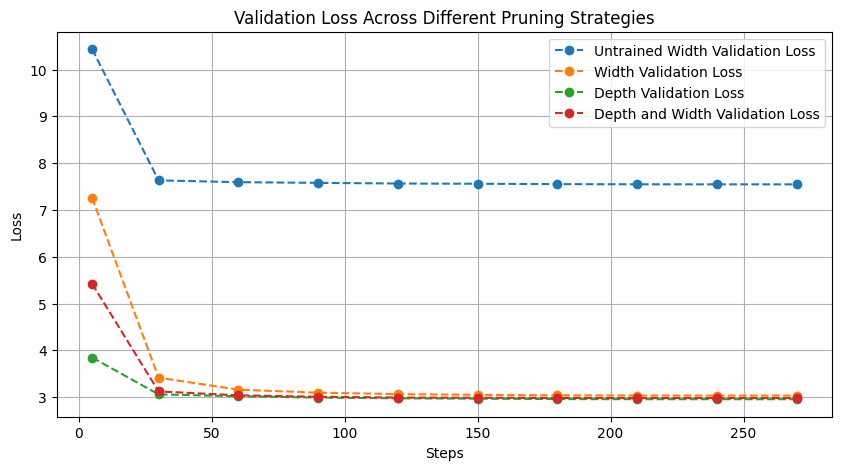

In [31]:
print(all_metrics.keys())
width_comparison_metrics = ['untrained_num_heads=12_mlp_exp=2.5_embed_size=1024', 'num_heads=12_mlp_exp=2.5_embed_size=1024', 'depth=16', 'depth=20_num_heads=12_mlp_exp=3.5_embed_size=1024']


names_dict = {
    'untrained_num_heads=12_mlp_exp=2.5_embed_size=1024': 'Untrained Width',
    'num_heads=12_mlp_exp=2.5_embed_size=1024': 'Width',
    'depth=16': 'Depth',
    'depth=20_num_heads=12_mlp_exp=3.5_embed_size=1024': 'Depth and Width'
}

plot_all_validation_metrics({e: all_metrics[e] for e in width_comparison_metrics}, names_dict=names_dict)

In [25]:
# for k, v in embedding_metrics.items():
#     plot_metric(k, v)

In [6]:
# for k, v in all_metrics.items():
#     plot_metric(k, v)

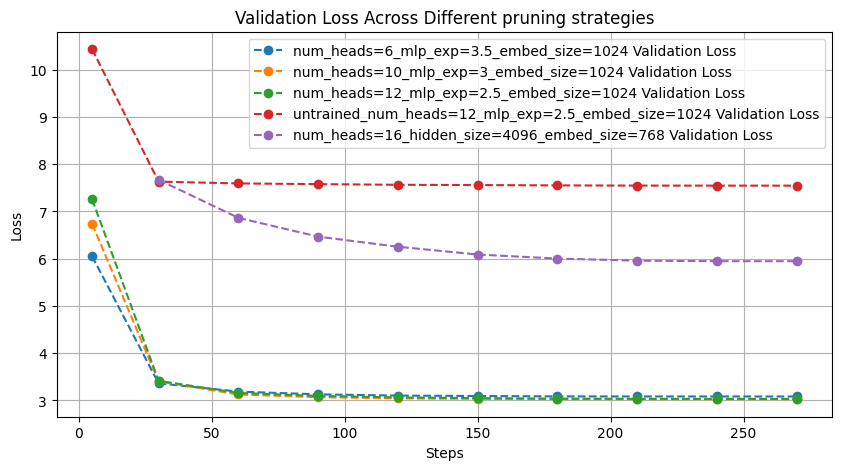

In [5]:
plot_all_validation_metrics(all_metrics)

In [9]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np

# Define the file path for metrics
metrics_path = "../saved_metrics/kd_metrics.json"

def load_training_metrics(model_name):
    """
    Loads training and validation metrics for a given model and depth from kd_metrics.json.
    
    Args:
        model_name (str): Name of the model.
        depth (str): Depth identifier.
    
    Returns:
        tuple: (steps, train_losses, val_steps, val_losses)
    """
    if not os.path.exists(metrics_path):
        raise FileNotFoundError(f"Metrics file not found at {metrics_path}")

    # Load the saved metrics
    with open(metrics_path, "r") as f:
        kd_metrics = json.load(f)

    # Extract stored metrics
    steps = kd_metrics[model_name][model_name]["steps"]
    train_losses = kd_metrics[model_name][model_name]["train_losses"]
    val_losses = kd_metrics[model_name][model_name]["val_losses"]

    # Generate validation steps to match their lower frequency
    val_steps = np.linspace(steps[0], steps[-1], len(val_losses))

    return steps, train_losses, val_steps, val_losses

def plot_training_progress(model_name):
    """
    Loads and plots training progress for a given model and depth.

    Args:
        model_name (str): Name of the model.
        depth (str): Depth identifier.
    """
    # Load training and validation data
    steps, train_losses, val_steps, val_losses = load_training_metrics(model_name)

    plt.figure(figsize=(10, 5))
    plt.plot(steps, train_losses, label="Training Loss", alpha=0.7, linewidth=1)

    plt.scatter(val_steps, val_losses, color="red", label="Validation Loss", marker="o")

    # Labels and title
    plt.xlabel("Training Steps")
    plt.ylabel("Loss")
    plt.title(f"Training Progress ({model_name})")
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()


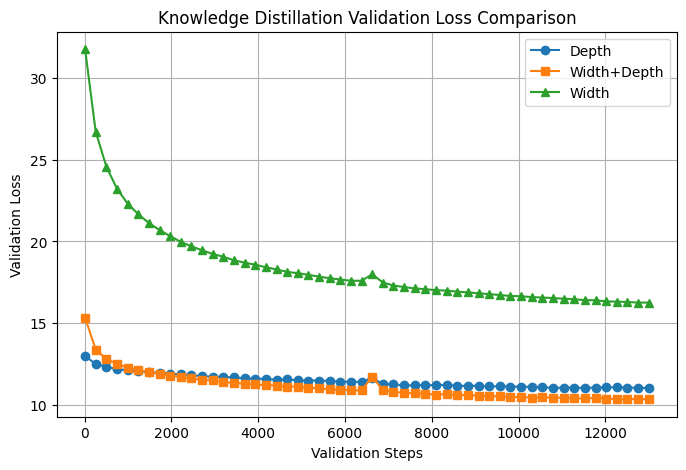

In [15]:
steps, train_losses, val_steps, val_losses_1 = load_training_metrics('depth')
steps, train_losses, val_steps, val_losses_2 = load_training_metrics('width+depth')
steps, train_losses, val_steps, val_losses_3 = load_training_metrics('width')

plt.figure(figsize=(8, 5))
plt.plot(val_steps, val_losses_1, label='Depth', marker='o')
plt.plot(val_steps, val_losses_2, label='Width+Depth', marker='s')
plt.plot(val_steps, val_losses_3, label='Width', marker='^')

# Formatting the plot
plt.xlabel("Validation Steps")
plt.ylabel("Validation Loss")
plt.title("Knowledge Distillation Validation Loss Comparison")
plt.legend()
plt.grid(True)
plt.show()